# **Cogbifyz Task - 1**

# Task : Predict Restaurant Ratings


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('/content/Dataset .csv')

In [3]:
dataset.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
dataset.describe()


,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [7]:
dataset.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [8]:
dataset.duplicated().sum()

0

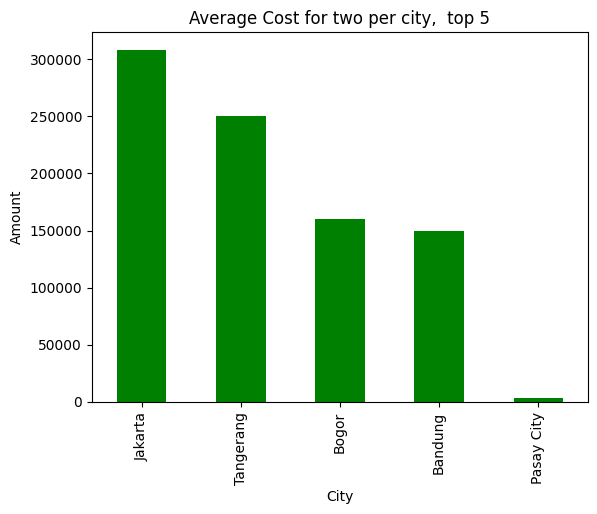

In [15]:
dataset.groupby("City")["Average Cost for two"].mean().sort_values(ascending = False).head().plot(kind = "bar",color = "g")
plt.title("Average Cost for two per city,  top 5")
plt.xlabel("City")
plt.ylabel("Amount")
plt.show()

In [17]:
# Cuisines total number of votes
data = dataset.groupby("Cuisines")["Votes"].sum().reset_index()

In [18]:
data[data["Votes"] != 0  ]

,Cuisines,Votes
0,Afghani,39
1,"Afghani, Mughlai, Chinese",2
3,"Afghani, North Indian, Pakistani, Arabian",3
4,African,373
5,"African, Portuguese",265
...,...,...
1820,"Western, Asian, Cafe",259
1821,"Western, Fusion, Fast Food",32
1822,World Cuisine,95
1823,"World Cuisine, Mexican, Italian",115


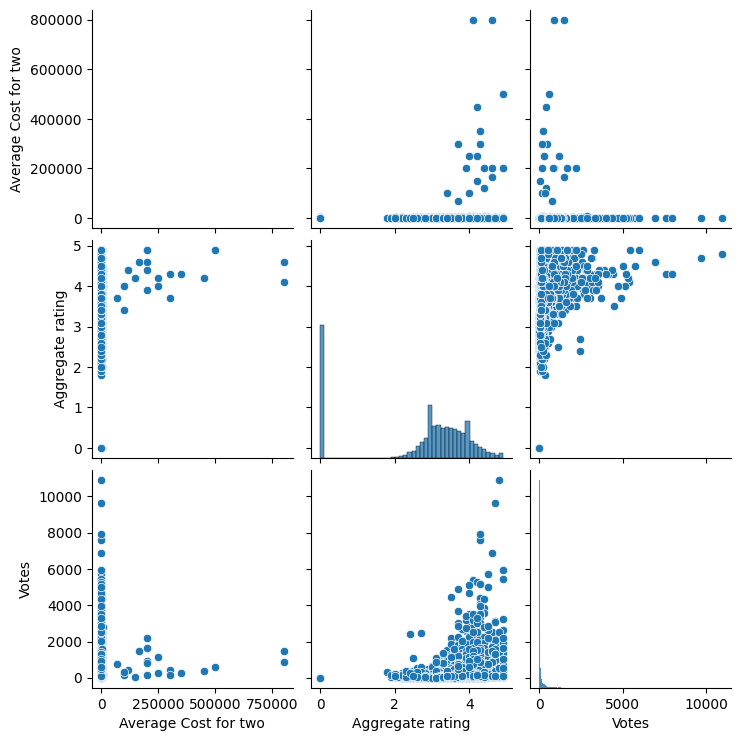

In [19]:
sns.pairplot(dataset[["Average Cost for two","Aggregate rating","Votes"]])

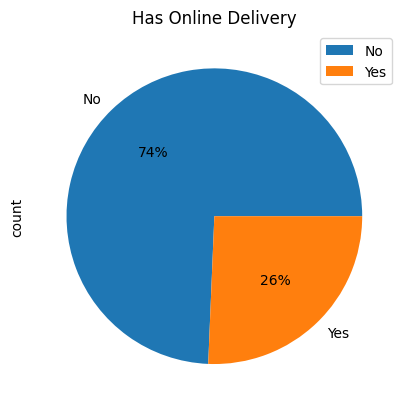

In [20]:
dataset["Has Online delivery"].value_counts().plot(kind = "pie",autopct='%.0f%%')
plt.title("Has Online Delivery")
plt.legend()
plt.show()

In [21]:
dataset[["Aggregate rating","Rating text"]].sort_values(by = "Aggregate rating",ascending = True).head(2300)

,Aggregate rating,Rating text
6615,0.0,Not rated
1994,0.0,Not rated
1995,0.0,Not rated
1996,0.0,Not rated
1997,0.0,Not rated
...,...,...
8716,2.4,Poor
4953,2.4,Poor
1771,2.4,Poor
8467,2.4,Poor


In [22]:
dataset = dataset[dataset["Rating text"] != "Not rated"]

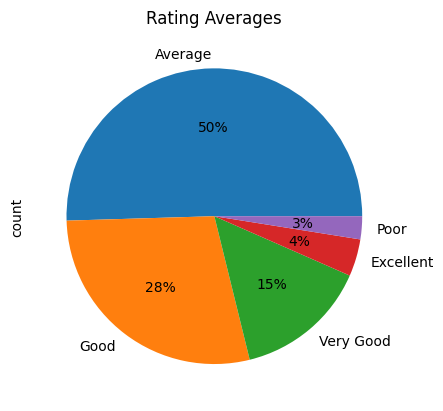

In [23]:
dataset["Rating text"].value_counts().plot(kind = "pie",autopct='%.0f%%')
plt.title("Rating Averages")
plt.show()

In [24]:
x = dataset[["Average Cost for two","Has Table booking","Has Online delivery","Price range"]]

Above 2 below 2.5 poor

Above 2.5 below 3.5 Average

Above 3.5 below 4.0 Good

Above 4 below 4.5 Very Good

Above 4.5 below Excellent

In [25]:
y = dataset[["Aggregate rating"]]

In [26]:
x["Price range"].value_counts()

,count
Price range,
1,2744
2,2711
3,1373
4,575


In [27]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

In [28]:
x["Has Table booking"] = labelencoder.fit_transform(x["Has Table booking"])

<ipython-input-28-a2e13b2f5ff5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Has Table booking"] = labelencoder.fit_transform(x["Has Table booking"])


In [29]:
x

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,1,No,3
1,1200,1,No,3
2,4000,1,No,4
3,1500,0,No,4
4,1500,1,No,4
...,...,...,...,...
9546,80,0,No,3
9547,105,0,No,3
9548,170,0,No,4
9549,120,0,No,4


In [30]:
x["Has Online delivery"] = labelencoder.fit_transform(x["Has Online delivery"])

<ipython-input-30-b657ba4a0e51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Has Online delivery"] = labelencoder.fit_transform(x["Has Online delivery"])


In [31]:
labelencoder.classes_

array(['No', 'Yes'], dtype=object)

Has tabel booking 0 is no 1 is yes

Has Online delivery 0 is no 1 is Yes

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [33]:
x = scaler.fit_transform(x)

In [34]:
x

array([[-0.0190367 ,  2.37978283, -0.68302371,  1.10671644],
       [-0.0135729 ,  2.37978283, -0.68302371,  1.10671644],
       [ 0.13941344,  2.37978283, -0.68302371,  2.18135204],
       ...,
       [-0.06985002, -0.42020641, -0.68302371,  2.18135204],
       [-0.07258191, -0.42020641, -0.68302371,  2.18135204],
       [-0.07613338, -0.42020641, -0.68302371,  0.03208084]])

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [37]:
print(x.shape, y.shape)

(7403, 4) (7403, 1)


In [38]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np

In [39]:
def model_results(predictions):
    print("Mean Absolute Error on model is: {}".format(mean_absolute_error(y_test, predictions)))
    print("Mean Squared Error on model is: {}".format(mean_squared_error(y_test, predictions)))

In [40]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [41]:
lr.fit(x_train,y_train)

LinearRegression()

In [42]:
predictionsfromlr = lr.predict(x_test)

In [43]:
model_results(predictionsfromlr)

Mean Absolute Error on model is: 0.3997372644598929
Mean Squared Error on model is: 0.25496875360279236


In [44]:
predictionsfromlr

array([[3.21939732],
       [3.42569124],
       [3.59417313],
       ...,
       [3.59353613],
       [3.21920622],
       [3.42581864]])

In [45]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [46]:
svrmodel = SVR()


In [47]:
# Define the parameter grid with the correct lowercase parameter name
param_gridsvr = {
    'C': [0.1,0.5],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['linear', 'poly'],"degree" : [ 2 ] # Use 'kernel' instead of 'Kernel'
}

# Instantiate and run GridSearchCV
gridsvr = GridSearchCV(svrmodel, param_gridsvr)
gridsvr.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 0.5], 'degree': [2],
                         'epsilon': [0.01, 0.1, 1],
                         'kernel': ['linear', 'poly']})

In [48]:
predsgridsvr= gridsvr.predict(x_test)

In [49]:
model_results(predsgridsvr)

Mean Absolute Error on model is: 0.4012979559311934
Mean Squared Error on model is: 0.26497612640419665


In [50]:
from sklearn.tree import DecisionTreeRegressor

In [51]:
param_grid = {
    "max_depth":[10,30],
    "min_samples_leaf":[1,2],
    "min_samples_split":[2,5]
}

In [52]:
tree_model = DecisionTreeRegressor()

In [53]:
# Suppose grid_tree is an instance of GridSearchCV
grid_tree = GridSearchCV(tree_model, param_grid)

# Fit it to your training data
grid_tree.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10, 30], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]})

In [54]:
pred_tree = grid_tree.predict(x_test)

In [55]:
model_results(pred_tree)

Mean Absolute Error on model is: 0.36231303792505226
Mean Squared Error on model is: 0.20929679594653436
